In [1]:
import pandas as pd
import numpy as np
from bayesian_calibration import BayesianCalibration

 # Use default_rng() for reproducibility (with seed 1 as per your setup)
rg = np.random.default_rng(1)

### Investiagting effect of different datatypes on calibration 

In [2]:
# Import Data and Emulators
n_samples = 500
n_params = 5

# Data
input_file = pd.read_csv(f"../Emulation/Input/input_{n_samples}_{n_params}params.csv")
full_output = pd.read_csv("../Emulation/Outputs/Output_500_5params/full_output.csv")

# emulators
emulators = pd.read_pickle("../Emulation/Outputs/Output_500_5params/Emulators/linear_models_and_r2_scores_500.csv")
emulators

,R2_Score,MSE,RSE,Model
0,0.893000,0.033581,0.184362,LinearRegression()
1,0.892594,0.020753,0.144933,LinearRegression()
2,0.894500,0.012332,0.111723,LinearRegression()
3,0.898439,0.007143,0.085030,LinearRegression()
4,0.902824,0.004173,0.064987,LinearRegression()
...,...,...,...,...
PC6,0.484459,0.030169,0.174744,LinearRegression()
PC7,0.720384,0.007104,0.084794,LinearRegression()
PC8,0.053464,0.007135,0.084981,LinearRegression()
PC9,0.015008,0.002188,0.047059,LinearRegression()


### Summary Stats of Waveform


/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


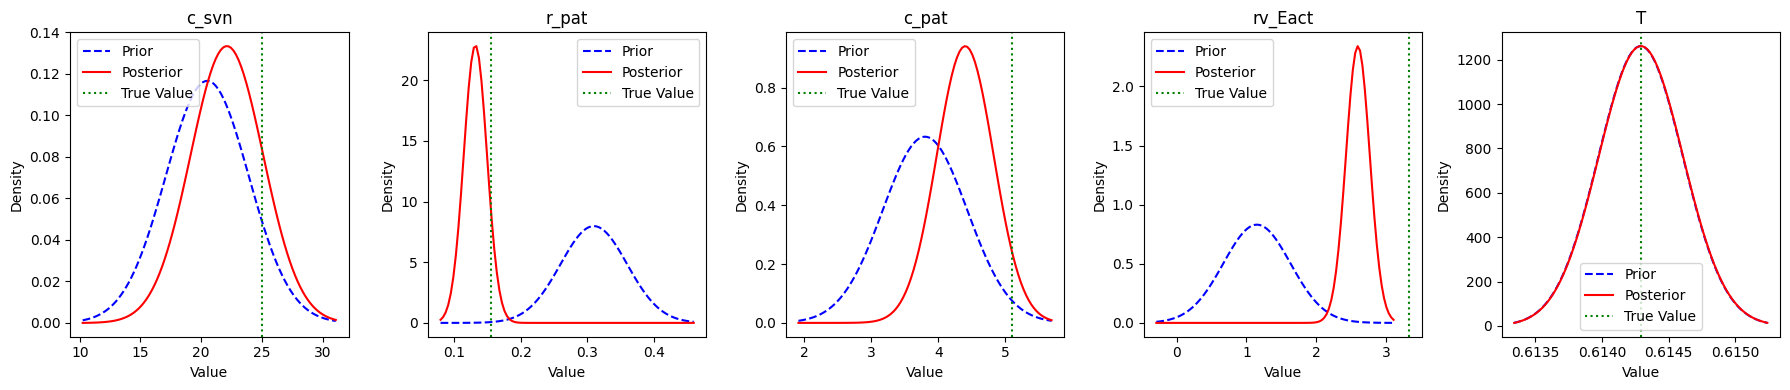

In [3]:
output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']
selected_rows = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_summary = BayesianCalibration(input_file, selected_rows, filtered_output, which_obs=3)

bc_summary.compute_posterior()
bc_summary.plot_distributions()

bc_summary.sample_posterior(n_samples=100)
bc_summary.samples_df.to_csv("../Results/posterior_samples_summarystats.csv")

### Waveform Only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


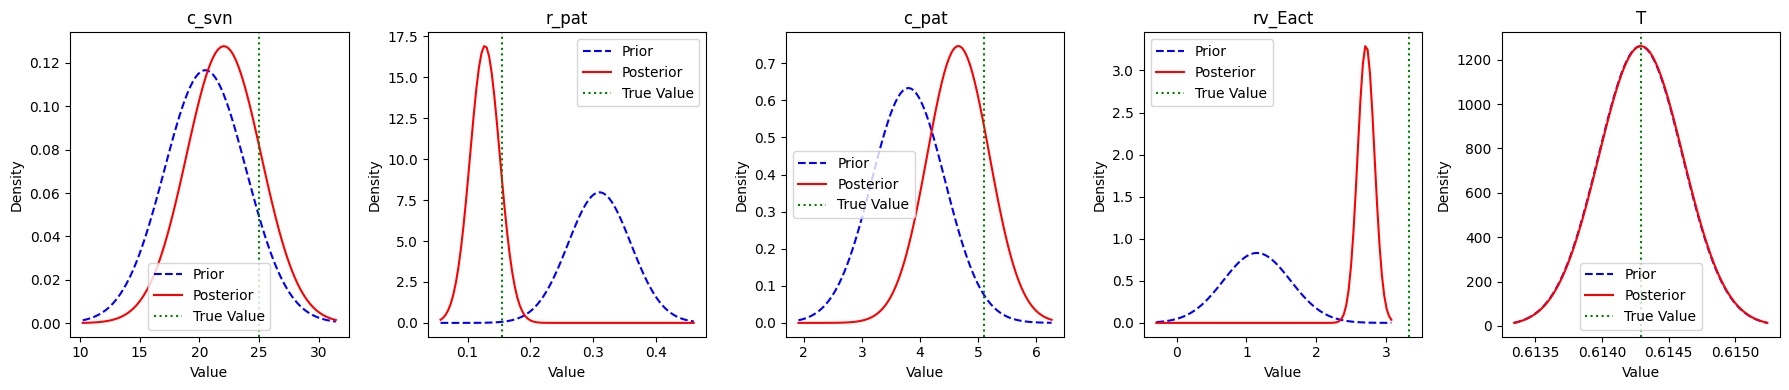

In [4]:

output_keys = full_output.iloc[:,:101].columns
selected_rows = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

obs_error = np.max(np.std(filtered_output))
size = filtered_output.shape[1]  # Ensure the matrix matches the size of filtered_output
e_obs = np.diag(np.full(size, obs_error))  # Create a diagonal matrix


bc_wave = BayesianCalibration(input_file, selected_rows, filtered_output, which_obs=3, epsilon_alt=e_obs)
bc_wave.compute_posterior()
bc_wave.plot_distributions()


bc_wave.sample_posterior(n_samples=100)
bc_wave.samples_df.to_csv("../Results/posterior_samples_waveform.csv")


### Waveform plus summaries

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


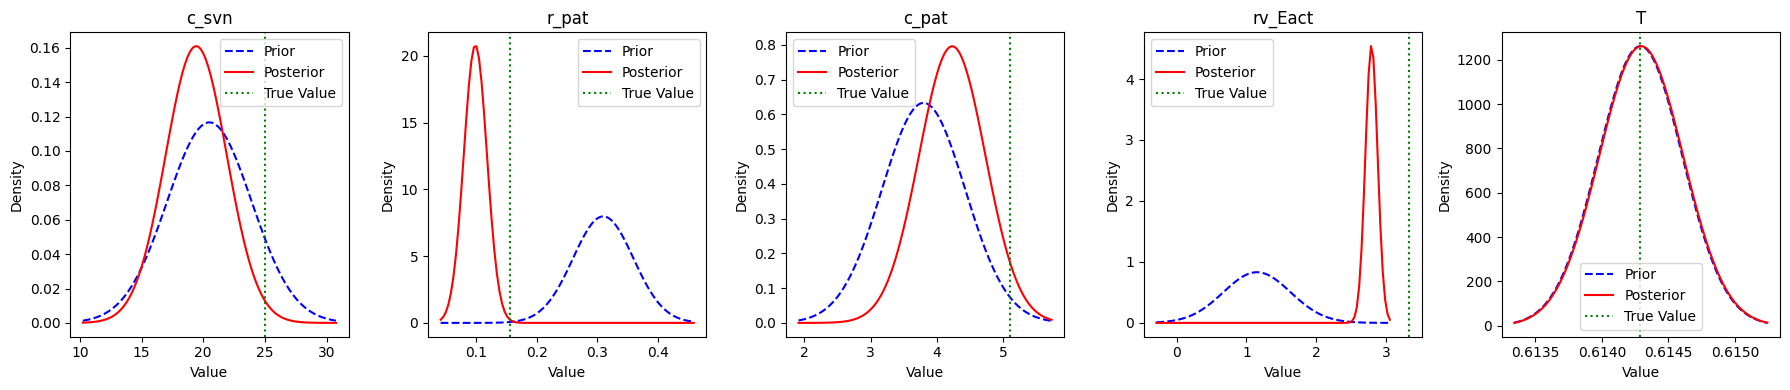

In [5]:

output_keys = full_output.iloc[:,:101].columns
selected_rows = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]


bc_plus = BayesianCalibration(input_file, selected_rows, filtered_output, which_obs=3)
bc_plus.compute_posterior()
bc_plus.plot_distributions()


bc_plus.sample_posterior(n_samples=100)
bc_plus.samples_df.to_csv("../Results/posterior_samples_waveplus.csv")

### PCA data only

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


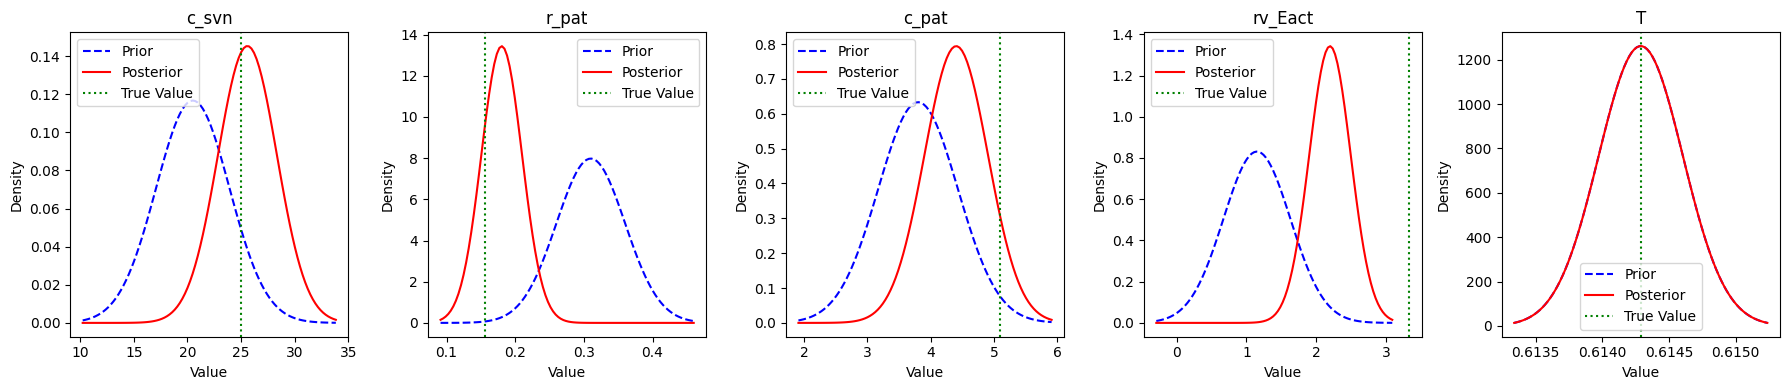

In [6]:
output_keys = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
selected_rows = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_pca = BayesianCalibration(input_file, selected_rows, filtered_output, which_obs=3)

bc_pca.compute_posterior()
bc_pca.plot_distributions()


bc_pca.sample_posterior(n_samples=100)
bc_pca.samples_df.to_csv("../Results/posterior_samples_pca.csv")

### Outputs where enmulator error is lowest

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


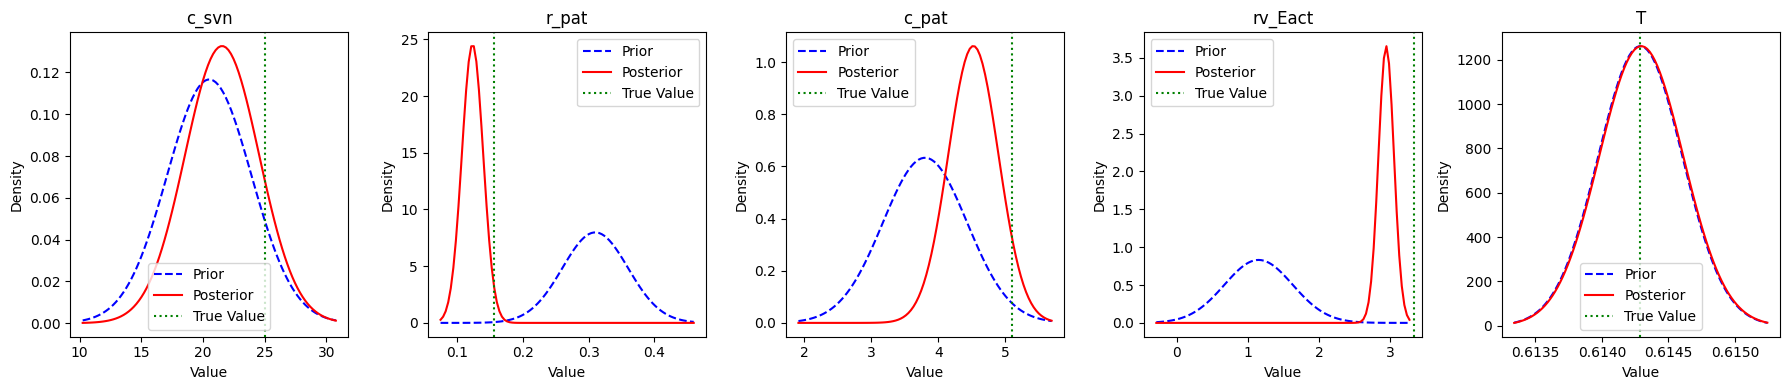

In [7]:
best_emulators = emulators.iloc[101:,:]['R2_Score'] > 0.9
output_keys = best_emulators[best_emulators].index

selected_rows = emulators.loc[output_keys]
filtered_output = full_output.loc[:, output_keys]

bc_best = BayesianCalibration(input_file, selected_rows, filtered_output, which_obs=3)

bc_best.compute_posterior()
bc_best.plot_distributions()


bc_best.sample_posterior(n_samples=100)
bc_best.samples_df.to_csv("../Results/posterior_samples_bestem.csv")